## Need of Normalization in Neural Network
============================================

Consider a neural network with 2 features - **_x1_** and **_x2_** in the input. <br>
**_x1_** $\epsilon$ $\{0, 1000\}$ and **_x2_** $\epsilon$ $\{0, 1\}$.<br>
Consider the weights assigned to edge connected to input **_x1_** be ***w1*** and **_x2_** be ***w2*** <br>

Then the output of the forward pass:
 ***o1*** = ***w1*******x1***+***w2*******x2***

 Considering the ground truth be ***o*** and Error Function be **MAE(mean absolute error)**, the error would be **E** = \(***o*** -  ***o1***\)<br>
The backward pass for w1 will be:
$\frac{\partial E}{\partial w1}$ = $\frac{\partial E}{\partial o1}$ * $\frac{\partial o1}{\partial w1}$ = ***-x1***
<br>
The backward pass for w2 will be:
$\frac{\partial E}{\partial w2}$ = $\frac{\partial E}{\partial o1}$ * $\frac{\partial o1}{\partial w2}$ = ***-x2***
<br>
<br>
As we can see the impact of ***x1*** will be larger on weight update for ***w1*** than that of ***x2*** on ***w2***. <br>
So, If the features don't have values in same range, the feature with large values will have dominate the learning process.<br>
This can cause the network to perform poorly.<br>
Normalization brings the values in same range and avoids the impact of outlier values..
<br>
<br>
Normalization also help neural network to converge better,by keeping the weights and activations within a reasonable range.<br>
This can help to prevent vanishing or exploding gradients, which can slow down or prevent learning. 
<br>
<br>
Normalization can also help to make the optimization process more stable by reducing the sensitivity of the network to changes in the input or weights.


## What is normalization

As mentioned above the normalizatioon brings the values in  particular range. <br>
The most common normalization method is to bring the mean to 0 and standrad deviation to 1 <br>
<br>
Let's see this with simple example

In [1]:
# Let's try out simple normalization on some random distribution
from torch import randint

In [2]:
x = randint(0, 20, (100, 2))
x = x.float()

In [3]:
# max and min values in distribution
import torch

In [4]:
torch.min(x[:, 0]), torch.max(x[:, 0])

(tensor(0.), tensor(19.))

In [5]:
torch.min(x[:, 1]), torch.max(x[:, 1])

(tensor(0.), tensor(19.))

In [6]:
# Let's Normalize the tensor
mean = x.mean(dim=0)

In [7]:
std = x.std(dim=0)

In [8]:
x_dash = (x - mean) / std

In [9]:
torch.min(x_dash[:, 0]), torch.max(x_dash[:, 0])

(tensor(-1.5484), tensor(1.6390))

In [10]:
torch.min(x_dash[:, 1]), torch.max(x_dash[:, 1])

(tensor(-1.7134), tensor(1.5584))

In [11]:
import matplotlib.pyplot as plt

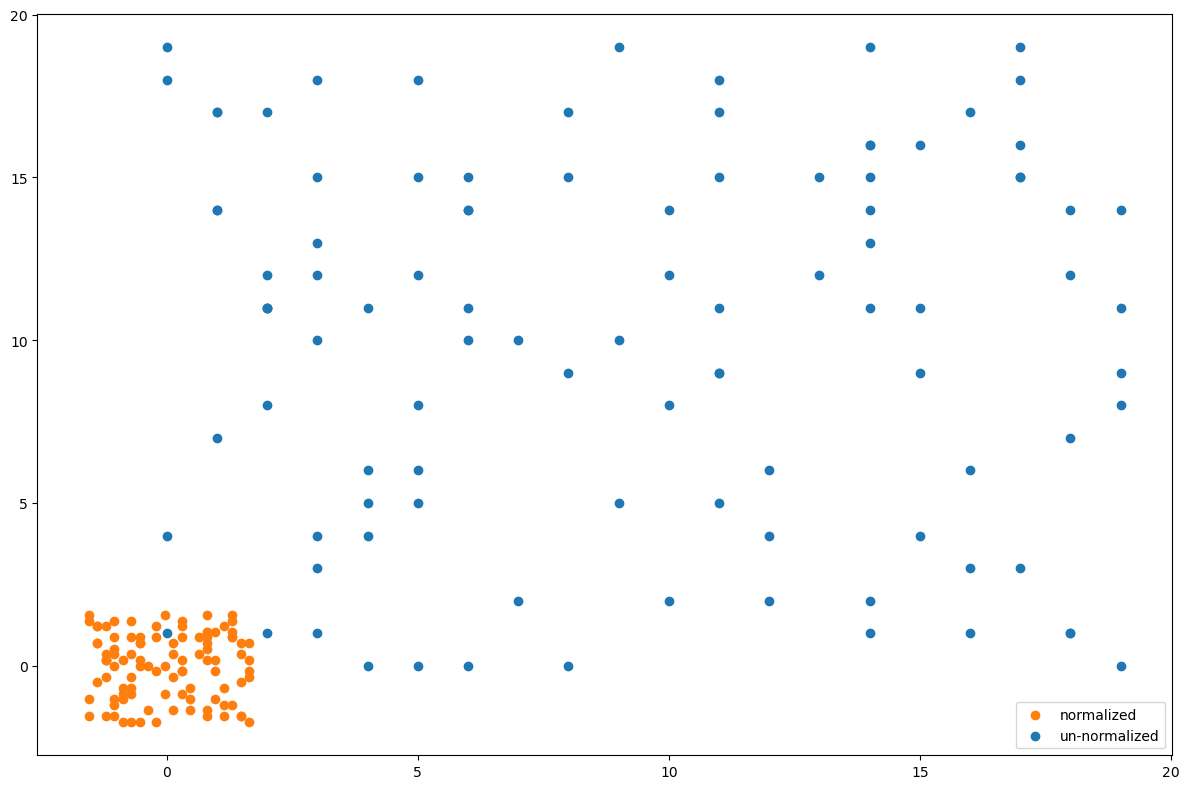

In [12]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(12, 8))
axes.scatter(x[:, 0], x[:, 1], label="un-normalized")
axes.scatter(x_dash[:, 0], x_dash[:, 1], label="normalized")
handles, labels = axes.get_legend_handles_labels()
axes.legend(handles[::-1], labels[::-1])
fig.tight_layout()

## What is Covariate shift?

Covariate shift is change in the distribution of input variables to neural network <br>
covariate shift can easily occur due to outliers <br>
Let's add few outliers to the distribution and see how the distribution looks <br>
And let's also check what happens when we apply normalization to the distribution with outliers.

In [13]:
# Add outliers to distribution
x_out = x.detach().clone()

In [14]:
x_out[:8, 0] = 31 * x_out[-8:, 0]
x_out[-8:, 1] = 17 * x_out[:8, 1]

In [15]:
mean_out = x_out.mean(dim=0)
mean_out

tensor([38.7000, 22.0800])

In [16]:
std_out = x_out.std(dim=0)
std_out

tensor([112.9115,  51.3537])

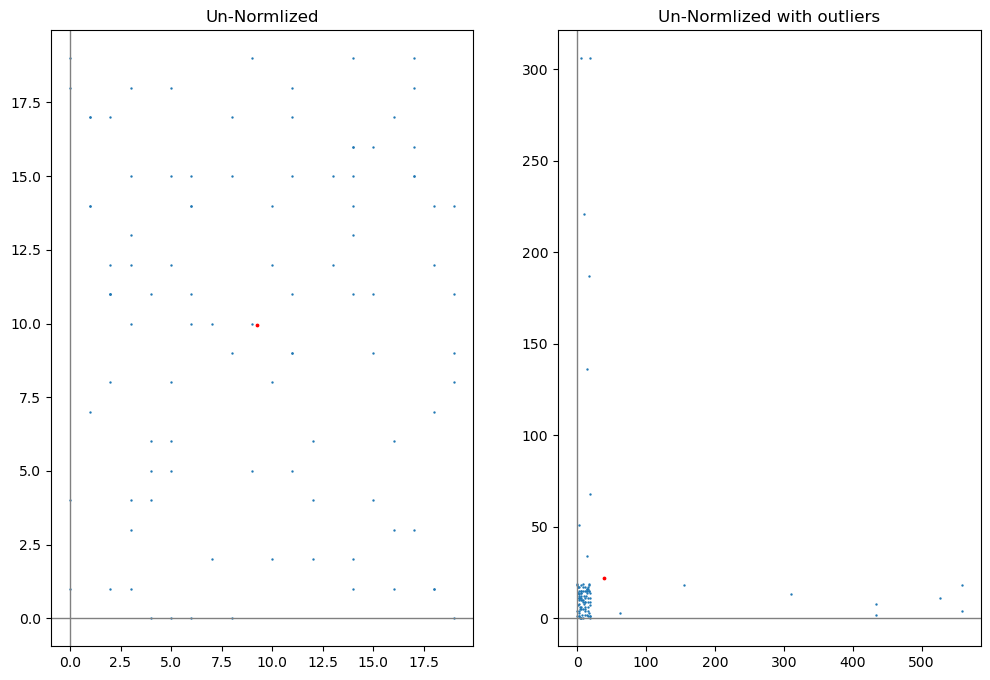

In [17]:
fig, axs = plt.subplots(1, 2, figsize=(12, 8))
###############################
axs[0].scatter(x[:, 0], x[:, 1], s=0.5)
axs[0].axvline(c='grey', lw=1)
axs[0].axhline(c='grey', lw=1)
axs[0].scatter(mean[0], mean[1], c='red', s=3)
axs[0].set_title(f"Un-Normlized")
###############################
axs[1].scatter(x_out[:, 0], x_out[:, 1], s=0.5)
axs[1].axvline(c='grey', lw=1)
axs[1].axhline(c='grey', lw=1)
axs[1].scatter(mean_out[0], mean_out[1], c='red', s=3)
axs[1].set_title(f"Un-Normlized with outliers")
###############################
plt.show()

As we can see the outliers can change the distribution and have impact on training of the neural network. <br>
BatchNormalization is introduced exactly to reduce the internal covariate shift. <br>

## Batch Normalization

<a href=https://arxiv.org/pdf/1502.03167> Paper </a>

***Internal Covariate Shift*** is the change in the distribution of network activations due to the change in network parameters during training.Training Deep Neural Networks is complicated. The distribution of each layer’s inputs changes during training, as the parameters of the previous layers change.This slows down the training by requiring lower learning rates and careful parameter initialization. <br>
<br>
In simple words, the input layer distribution is constantly changing due to weight update. In this case, the following layer always needs to adapt to the new distribution. It causes slower convergence and unstable training. <br>
<br>
Batch Normalization reduces ***Internal Covariate Shift*** and makes it easy to train the deep neural network with larger learning rate and converge it faster.

The neural network is trained using ***Stochastic Gradient Descent(SGD)***, where the input data is passed to network in batches <br>
Batch Normalization normalizes the input data across the batch dimension. Batch Normalization also presents a way to control and optimize the distribution after each layer. The process is identical to the input normalization, but we add two learnable parameters, γ, and β.
These two parameters are learned along the network using backpropagation. They optimize the distribution by ***scaling(γ)*** and ***shifting(β)*** activations.
<br><br>
Since distributions are fixed, the larger learning rate can be used and it can speed up the convergence.<br>
BatchNormalization also serves as a regularisation technique. The noise generated by approximation of the dataset’s statestics probably remove the need for dropout.

<br>
<center><img src="./files/batch_normalization.png"/></center>
<p style="text-align: center">
    <b>N- batch size, C — number of channels, H,W— spatial width and height. <a href=https://arxiv.org/pdf/1803.08494>Source</a></b>
</p>
<br>
Let's implement the Batch Normalization in pytorch

In [18]:
import torch.nn as nn

In [38]:
# Simple batch normalization implementation
class BatchNorm(nn.Module):
    r"""
    Applies Batch Normalization over 4D input tensor.
    Usually the pytorch batch has shape [N, C, H, W] 
    and the batch normalization is performed on the dimension C.
    The Output is tensor of same size as input.

    There are two learnable parameters of size C used to control the normalization.
    gamma - is used to scale the norm. It is usually set to 1 at the start.
    beta - is used to shift the norm. It is usually set to 0 at the start.

    Args:
        num_features(int): Number of features. It is the dimension C in
                           input tensor size [N, C, H, W]
        eps(float):        Value added to the denominator for numerical stability
                           Default = 1e-5

    Shapes:
        input :  [N, C, H, W]
        output : [N, C, H, W]

    Example:
        >>> x = torch.rand((10, 20, 5, 4))
        >>> bn = BatchNorm(20)
        >>> out = bn(x)
    """
    def __init__(self, num_features: int, eps: float=1e-05) -> None:
        super().__init__()
        self.num_features = num_features
        self.eps = eps
        self.register_params()

    def register_params(self):
        self.gamma = nn.Parameter(torch.ones((1, self.num_features, 1, 1)))
        self.beta = nn.Parameter(torch.zeros((1, self.num_features, 1, 1)))
        self.register_parameter('beta', self.beta)
        self.register_parameter('gamma', self.gamma)

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        assert x.ndim == 4, "Batch Normalization works with 4-D tensors."
        mean = torch.mean(x, dim=[0, 2, 3], keepdim=True) # [1, C, 1, 1]
        var = torch.var(x, dim=[0, 2, 3], keepdim=True, unbiased=False) # [1, C, 1, 1]
        norm = (x - mean) / torch.sqrt(var + self.eps)
        return self.gamma * norm + self.beta

In [39]:
# Let's test the implementation
x = torch.rand((1, 3, 2, 2))

In [40]:
my_batch_norm = BatchNorm(3)

In [41]:
output = my_batch_norm(x)

In [42]:
output.shape

torch.Size([1, 3, 2, 2])

In [43]:
# Let's compare the results with pytorch's BatchNorm2D
pt_batch_norm = nn.BatchNorm2d(3, momentum=0.0, affine=False)

In [44]:
output_pt = pt_batch_norm(x)

In [45]:
output_pt

tensor([[[[ 0.8108, -0.1691],
          [ 0.9254, -1.5672]],

         [[ 1.1333,  0.4810],
          [-1.5755, -0.0388]],

         [[-0.1634, -1.5521],
          [ 1.0497,  0.6658]]]])

In [46]:
output

tensor([[[[ 0.8108, -0.1691],
          [ 0.9254, -1.5672]],

         [[ 1.1333,  0.4810],
          [-1.5755, -0.0388]],

         [[-0.1634, -1.5521],
          [ 1.0497,  0.6658]]]], grad_fn=<AddBackward0>)

In [47]:
torch.allclose(output, output_pt)

True

There are 2 issues with Batch Normalizations:

*  The normalization works well on large batch sizes as mean and variance estimations are fairly tolerable. For small batch sizes performance decreases significantly.

*  Model has to use mean and variance estimates calculated at training time, for calculations during inference time. This might lead to wrong results.

Due to these issues, various other variants of Normalization has been proposed and used, like:
* Layer Normalization
* Instance Normalization
* Group Normalization